## 🧠 Word Embedding (단어 임베딩)

단어를 **고차원 벡터(Vector)** 형태로 표현하여,  
컴퓨터가 단어의 **의미적 관계(Semantic Relationship)** 를 이해할 수 있도록 만드는 기술.

#### 💬 한줄 요약:
GloVe는 단어의 의미를 수학적 벡터로 표현하여,
단어 간의 관계(유사도·대체·의미 연결)를 계산할 수 있는 강력한 언어 모델이다.

---

### 📘 주요 개념 정리

| 항목 | 설명 |
|------|------|
| **기술명** | Word Embedding (단어 임베딩) |
| **대표 모델** | Word2Vec, **GloVe(Global Vectors for Word Representation)**, FastText |
| **핵심 원리** | 단어를 고차원 벡터로 변환하여 의미를 수치로 표현 |
| **특징** | 의미가 비슷한 단어일수록 벡터 공간에서 가까운 위치에 존재 |
| **활용 예시** | 유사도 측정, 감정 분석, 문장 의미 비교 등 |

---

### 💡 예시 개념

- **단어 간 의미적 유사도 (Semantic Similarity)**
  ```text
  similarity("king", "queen") → 높음
  similarity("king", "car") → 낮음


| 구분         | 내용                           |
| ---------- | ---------------------------- |
| **핵심 개념**  | 단어 의미를 벡터로 표현                |
| **대표 모델**  | GloVe, Word2Vec              |
| **주요 활용**  | 단어 유사도, 관계 분석, 문장 의미 파악      |
| **예시 관계식** | `king - man + woman = queen` |


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 4차원 임베딩 공간
word_vectors = {
    "king": np.array([0.9, 0.1, 0.2, 0.8]),
    "queen": np.array([0.8, 0.2, 0.3, 0.7]),
    "man": np.array([0.5, 0.8, 0.1, 0.3]),
    "woman": np.array([0.4, 0.9, 0.2, 0.2]),
}

# 각 차원이 의미있는 특성 인코딩
for word, vec in word_vectors.items():
    print(f'{word:8} -> {vec}')
# 의미적으로 가까운 단어들의 벡터도 가깝다  

king     -> [0.9 0.1 0.2 0.8]
queen    -> [0.8 0.2 0.3 0.7]
man      -> [0.5 0.8 0.1 0.3]
woman    -> [0.4 0.9 0.2 0.2]


#### Count-based 방법(기존)
#### cat , dog가 함께 나타나는 횟수를 카운트

#### Prediction-based  word2vec
#### cat 주변단어로부터 dog를 예측하도록 학습

#### 이 두가지 방법을 결합한게 Glove   Count통계 + 벡터학습의 최적화 결과

In [2]:
# 2. GloVe 원리 이해: 공기 행렬과 임베딩 학습
import numpy as np

# 간단한 코퍼스: "king is man" "queen is woman"
# 공기 행렬 (윈도우 크기 2)
cooccurrence_matrix = np.array([
    # king queen man woman is
    [0,   2,    1,   0,   2],  # king
    [2,   0,    0,   1,   2],  # queen
    [1,   0,    0,   2,   1],  # man
    [0,   1,    2,   0,   1],  # woman
    [2,   2,    1,   1,   0],  # is
], dtype=float)

words = ["king", "queen", "man", "woman", "is"]

print("=" * 60)
print("단어 행렬 (Co-occurrence Matrix)")
print("=" * 60)
print("       " + "  ".join(f"{w:6}" for w in words))
for i, word in enumerate(words):
    row_str = "  ".join(f"{int(cooccurrence_matrix[i][j]):6}" for j in range(len(words)))
    print(f"{word:6} {row_str}")

print("\n의미:")
print("- king과 queen이 자주 함께 나타남 (2회)")
print("- man과 woman도 자주 함께 나타남 (2회)")
print("- 모든 단어가 'is'와 함께 나타남")

단어 행렬 (Co-occurrence Matrix)
       king    queen   man     woman   is    
king        0       2       1       0       2
queen       2       0       0       1       2
man         1       0       0       2       1
woman       0       1       2       0       1
is          2       2       1       1       0

의미:
- king과 queen이 자주 함께 나타남 (2회)
- man과 woman도 자주 함께 나타남 (2회)
- 모든 단어가 'is'와 함께 나타남


In [4]:
v1 = np.array([1,2,3])
v2 = np.array([4,5,6])
v1 * v2 , np.dot(v1,v2)

(array([ 4, 10, 18]), np.int64(32))


 벡터 쌍 간의 코사인 유사도:
king         vs queen       :  0.9923
king         vs man         :  0.7894
king         vs unrelated   : -0.1961
queen        vs man         :  0.7071
queen        vs unrelated   : -0.3162
man          vs unrelated   :  0.4472


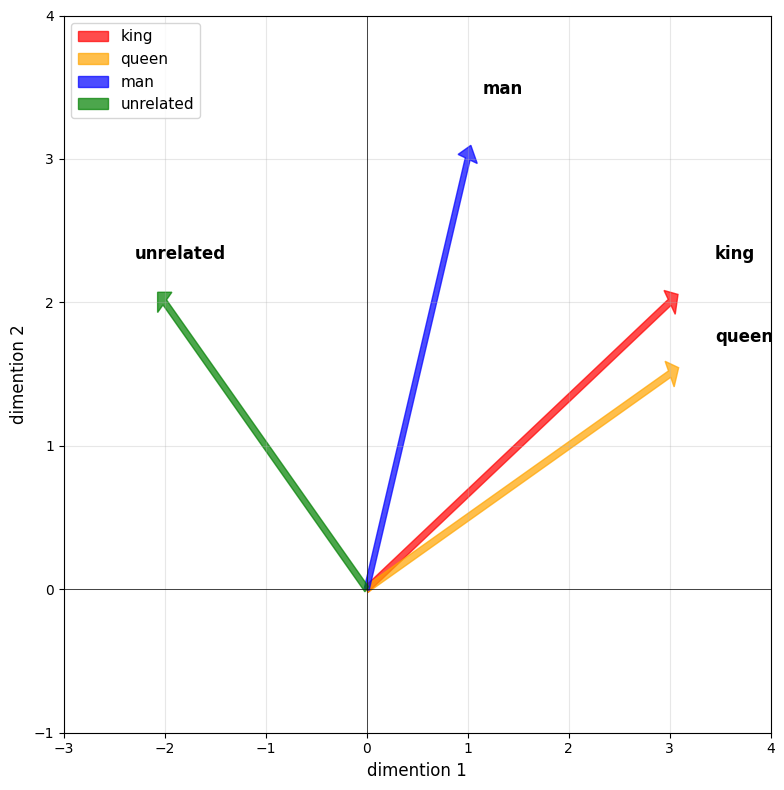


 관찰:
- king과 queen: 유사한 방향 → 높은 유사도
- king과 unrelated: 거의 수직 → 낮은 유사도


In [7]:
import numpy as np
import matplotlib.pyplot as plt
def cosine_similarity(v1, v2):
    """코사인 유사도 계산"""
    dot_product = np.dot(v1, v2)
    norm1 = np.linalg.norm(v1)  # 벡터의 크기(길이, norm) 계산 
    norm2 = np.linalg.norm(v2)
    return dot_product / (norm1 * norm2)

vectors = {
    "king": np.array([3.0, 2.0]),      # 상단 우측
    "queen": np.array([3.0, 1.5]),     # king과 유사한 방향
    "man": np.array([1.0, 3.0]),       # 다른 방향
    "unrelated": np.array([-2.0, 2.0]), # 거의 수직
}
# 모든쌍의 코사인 유사도 계산
print("\n 벡터 쌍 간의 코사인 유사도:")
words_list = list(vectors.keys())
for i, w1 in enumerate(words_list):
    for w2 in words_list[i+1:]:
        sim = cosine_similarity(vectors[w1], vectors[w2])
        print(f"{w1:12} vs {w2:12}: {sim:7.4f}")


# 시각화
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['red', 'orange', 'blue', 'green']
for (word, vec), color in zip(vectors.items(), colors):
    ax.arrow(0, 0, vec[0], vec[1], head_width=0.2, head_length=0.1, 
             fc=color, ec=color, alpha=0.7, label=word, width=0.05)
    ax.text(vec[0]*1.15, vec[1]*1.15, word, fontsize=12, fontweight='bold')

ax.set_xlim(-3, 4)
ax.set_ylim(-1, 4)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.grid(True, alpha=0.3)
ax.set_xlabel('dimention 1', fontsize=12)
ax.set_ylabel('dimention 2', fontsize=12)
ax.legend(loc='upper left', fontsize=11)
plt.tight_layout()
plt.show()

print("\n 관찰:")
print("- king과 queen: 유사한 방향 → 높은 유사도")
print("- king과 unrelated: 거의 수직 → 낮은 유사도")


In [ ]:
# %pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.4/24.4 MB 38.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [gensim]2m1/2 [gensim]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
